In [4]:
from __future__ import annotations

from slope_area.builder import Trial, TrialConfig
from slope_area.features import Outlet
from slope_area.geomorphometry import HydrologicAnalysisConfig
from slope_area.paths import PROJ_ROOT
from slope_area.plot import SlopeAreaPlotConfig, slope_area_plot

In [5]:
dem = PROJ_ROOT / 'data' / 'raw' / 'copdem_30m.tif'
out_dir = PROJ_ROOT / 'data' / 'processed' / '00_minimal_example'
out_fig = out_dir / 'slope_area.png'
assert dem.exists()

14:35:55 INFO slopeArea.slope_area.builder.Trial                  run(): Running...
14:35:55 INFO slopeArea.slope_area.builder.Trial read_whitebox_raster(): Reading raster copdem_30m.tif
14:35:55 INFO slopeArea.slope_area.builder.Trial       preprocess_dem(): Breaching depressions in the DEM
14:35:55 INFO slopeArea.slope_area.builder.Trial       preprocess_dem(): Breaching single-cell pits
14:35:55 INFO slopeArea.slope_area.geomorphometry              wrapper(): preprocess_dem executed in 0.082424 seconds
14:35:55 INFO slopeArea.slope_area.builder.Trial         compute_flow(): Computing the D8 pointer
14:35:55 INFO slopeArea.slope_area.builder.Trial         compute_flow(): Computing the flow accumulation
14:35:55 INFO slopeArea.slope_area.geomorphometry              wrapper(): compute_flow executed in 0.065042 seconds
**********************************************************************************
            DEM needs to be processed to remove topographic depressions and flats prior

<Axes: xlabel='Drainage area (m$^2$)', ylabel='Slope (m/m)'>

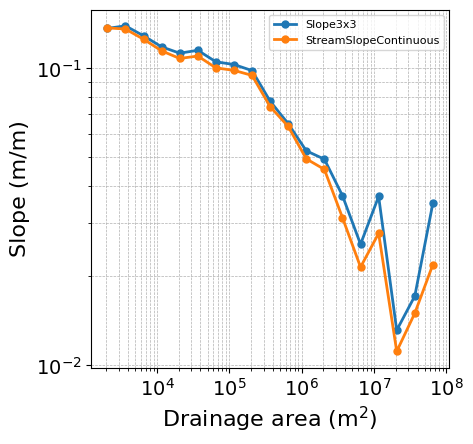

In [6]:
outlet = Outlet.from_xy(711339, 533362, name='outlet')
trial_config = TrialConfig(
    outlet.name,
    outlet,
    dem=dem,
    hydrologic_analysis_config=HydrologicAnalysisConfig(
        streams_flow_accumulation_threshold=1000, outlet_snap_distance=100
    ),
    out_dir=out_dir,
)
trial = Trial(trial_config).run()
slope_area_plot(
    data=trial.df,
    out_fig=out_fig,
    config=SlopeAreaPlotConfig(hue='slope_type', legend_font_size=8),
)